In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
os.chdir(r"C:\Users\kaborg15\Python_projects\Vibrent_Style_Quiz_Generation")

import pandas as pd
from resources.constants import *
from src import load_dataframes

OUTFIT_EMBEDDINGS_DF_PATH = r"resources\data\outfit_embeddings_df.pkl"
REPRESENTATION_COLUMN = "outfit_embeddings"

pictures_df = pd.read_csv(PICTURE_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)
user_triplets_df = pd.read_csv(USER_ACTIVITY_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)

embeddings_df = pd.read_pickle(OUTFIT_EMBEDDINGS_DF_PATH)

In [3]:
import numpy as np

input_embeddings = np.stack(embeddings_df[REPRESENTATION_COLUMN].values)

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(input_embeddings, 'ward', metric='euclidean')




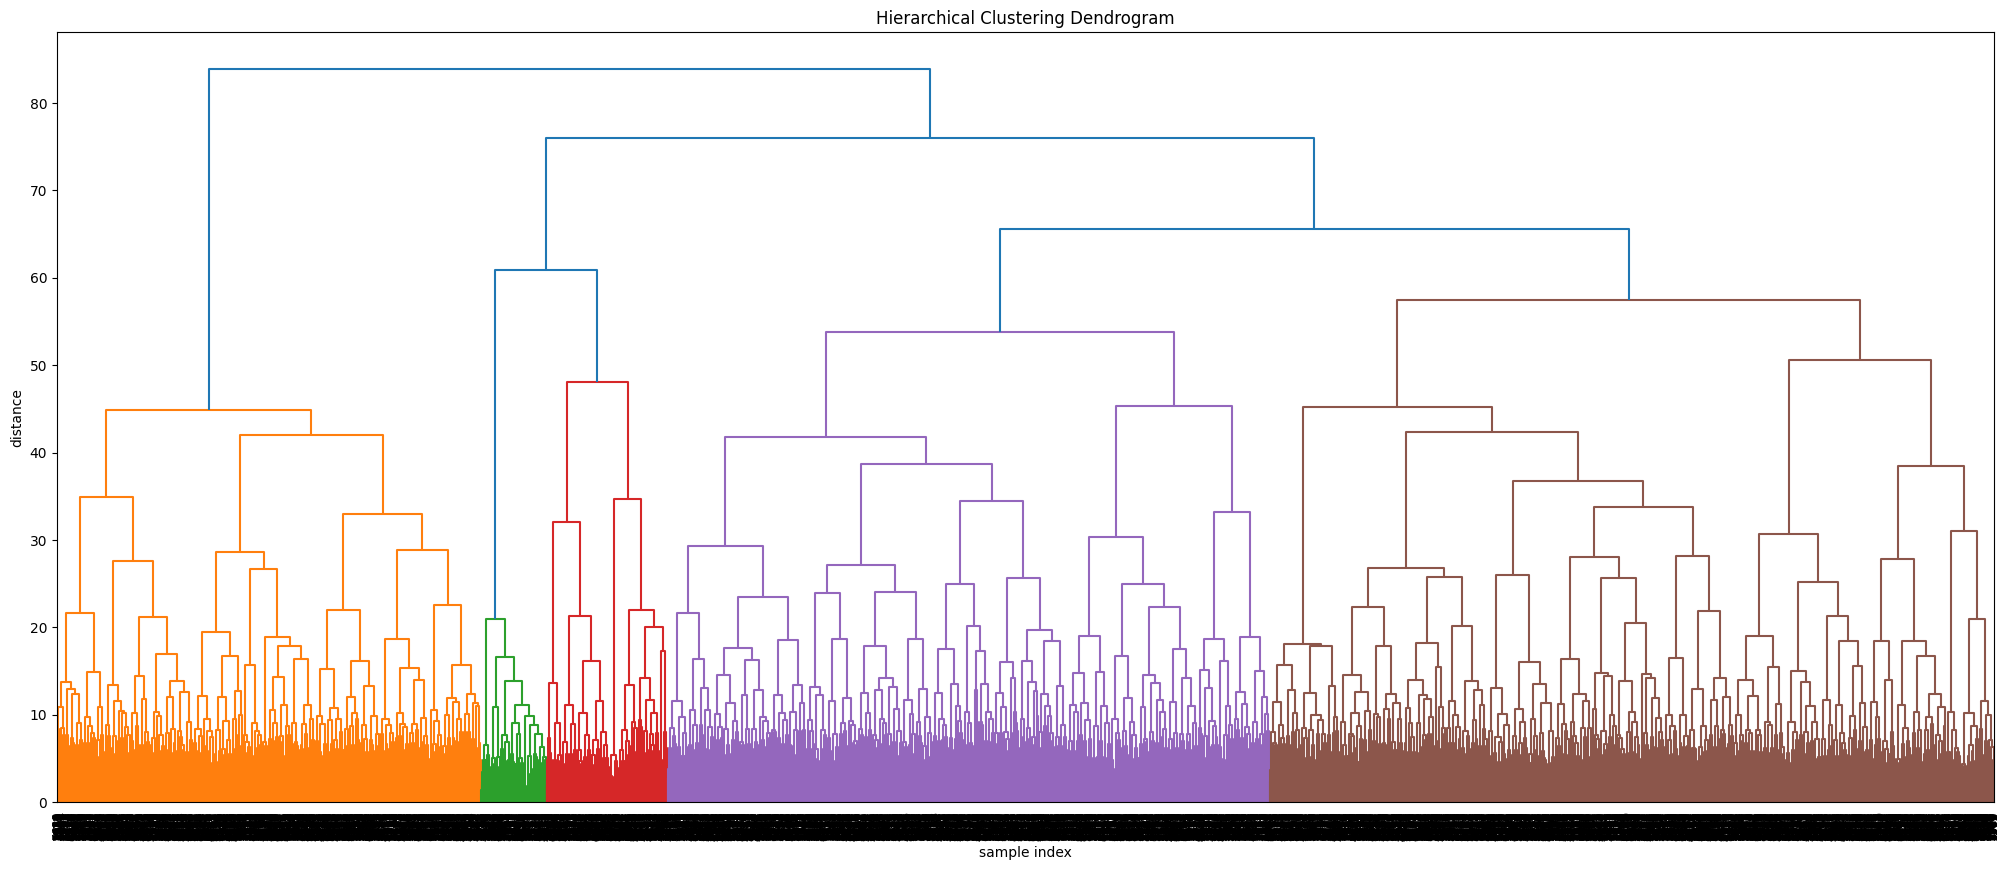

In [10]:

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [13]:
embeddings_df

,group,id,name,description,owner,timeCreated,retailPrice,meta.validTo,outfit_tags,tag_categories,...,picture_ids,num_pictures,lead_embedding,lead_picture_id,num_positive_examples,filtered_tags,filtered_categories,one_hot_encoded,concatenated_embeddings,outfit_embeddings
0,group.00064a241ade73e6a5a7ad36327e4e83,outfit.d138f31106ac442f9b2e0fe163597405,New Justine Coat,"The Justine Coat features a high neck, a hidde...",user.3b5555d48f6b473f8e58956aadc0e21f,2021-10-01 10:48:04.675,3500.0000,9999-01-01 00:00:00,"[Synthetic, Multi Season, Everyday, Day Birger...","[Material, Seasons, Occasion, Brand, Size, Col...",...,[picture.7040fcb864074b28bae3c09f66972ed0],1,"[0.007065, -0.04868, -0.05066, 0.1659, 1.448, ...",picture.7040fcb864074b28bae3c09f66972ed0,186,"[Synthetic, Multi Season, Everyday, Day Birger...","[Material, Seasons, Occasion, Brand, Color, Ge...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.12740439176559448, 0.11191237717866898, 0.4..."
1,group.000957e12deba05e437a5e9726e8002c,outfit.93826cc51216dcd0,Sophisticated Dress,This dress is perfect for a summer night out w...,user.15bee69d2f1541d785eee3f047ec5cf9,2017-05-08 13:28:30.000,10000.0000,9999-01-01 00:00:00,"[Fall, Dresses, XS, Prada, Grey, Women, Business]","[Seasons, Category, Size, Brand, Color, Gender...",...,"[picture.bdfc85951b9babcf, picture.b80df15a205...",6,"[-0.0823, -0.131, 0.2832, -0.1334, -0.08594, -...",picture.bdfc85951b9babcf,1716,"[Fall, Grey, Women, Business]","[Seasons, Color, Gender, Occasion]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.7615255117416382, 0.6740720868110657, 0.999..."
2,group.000aad5ac8cfefd8063ee16f6f57b2c1,outfit.edbe38fccd174c3cac918d1347b7811e,Prenestina Jacket Baby Blue Jacket,"Super elegant, constructed jacket with puffed ...",user.0cc54cbd6fa246599239e9adce341264,2022-03-28 13:54:38.895,2500.0000,9999-01-01 00:00:00,"[Cotton, C.L.E.A.N by Christina Ledang, Viscos...","[Material, Brand, Material, Category, Occasion...",...,"[picture.3a1be6c7ace347caa0ce0cc495d0ae2c, pic...",4,"[1.335, -0.1155, 0.01475, -0.03061, 0.1024, 0....",picture.3a1be6c7ace347caa0ce0cc495d0ae2c,1135,"[Cotton, C.L.E.A.N by Christina Ledang, Viscos...","[Material, Brand, Material, Occasion, Seasons,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.00970106665045023, 0.5155781507492065, 0.01..."
3,group.00136735b2578e9c5d3264375b6f4804,outfit.5c8d69783c04405081f121d327123521,ZWNo01 Sweater,ZWNo1 is a chunky hand-knit sweater from Bernt...,user.b62e7bd166424c819a2501d83b28b037,2024-01-18 05:23:19.035,6170.0000,9999-01-01 00:00:00,"[Wool, Winter, Purple, L, Knitwear, Everyday, ...","[Material, Seasons, Color, Size, Category, Occ...",...,"[picture.4dd4267a6ace4b22b03ff2913148d9ee, pic...",2,"[-0.07965, -0.091, 1.542, 0.07306, 0.2947, -0....",picture.4dd4267a6ace4b22b03ff2913148d9ee,273,"[Wool, Winter, Purple, Everyday, Fall, Pattern...","[Material, Seasons, Color, Occasion, Seasons, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0008165882900357246, 0.0818406194448471, 0...."
4,group.00177dcb8a3afabaa5f899443a92154d,outfit.92a9f025465bd509,Out of stock - Latonia Dress,HAR BLITT HENTET AV EIER 03.09.2017.\nSKAL IKK...,user.a00e19bc644fb8f2,2017-02-13 16:31:31.000,6500.0000,9999-01-01 00:00:00,"[Dresses, Beige, S]","[Category, Color, Size]",...,"[picture.b785cc1c1a925b21, picture.abb05badaea...",4,"[0.05737, -0.04572, -0.0863, -0.05783, -0.1046...",picture.b785cc1c1a925b21,0,[Beige],[Color],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.9972739815711975, 0.015878381207585335, 0.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9786,group.ffe3a5c7cf5d53385d918d7175ac9a80,outfit.b1aa45faec994c2bbad4d58e988

In [17]:
Z.shape, embeddings_df.shape

((9790, 4), (9791, 23))

In [25]:
for row in Z:
    num_0, num_1, distance, num_2 = row
    if not num_0.is_integer() or not num_1.is_integer() or not num_2.is_integer():
        raise ValueError("Not integer")
    
    num_0, num_1, num_2 = int(num_0), int(num_1), int(num_2)
    print(f"{num_0} {num_1} {distance} {num_2}")

527 6573 0.0 2
3264 9066 0.0 2
9204 9792 0.0 3
9756 9793 0.0 4
4547 7255 0.0 2
1352 3588 0.0 2
2042 5593 0.0 2
5274 6515 0.0 2
23 7791 0.0 2
824 6966 0.0 2
915 2657 0.0 2
7195 9801 0.0 3
5934 8968 0.0 2
1370 1884 0.0 2
3484 9804 0.0 3
4765 9805 0.0 4
7669 7917 0.0 2
1972 9230 0.0 2
1817 1952 0.0 2
3627 9809 0.0 3
6544 9810 0.0 4
645 994 0.0 2
422 8034 0.0 2
3047 5599 0.0 2
2774 9252 0.0 2
5127 8320 0.0 2
6583 8230 0.0 2
2730 6670 0.0 2
8121 9818 0.0 3
2222 5061 0.0 2
1093 6672 0.0 2
1001 1967 0.0 2
7517 9822 0.0 3
1323 2467 0.0 2
1465 6847 0.0 2
1760 9014 0.0 2
1018 2562 0.0 2
9458 9827 0.0 3
3537 8331 0.0 2
1418 3703 0.0 2
6407 6825 0.0 2
2455 2873 0.0 2
3828 9832 0.0 3
6758 9833 0.0 4
9760 9834 0.0 5
3633 9501 0.0 2
2066 9097 0.0 2
4050 6799 0.0 2
481 7598 0.0 2
672 4153 0.0 2
3665 5252 0.0 2
7020 9841 0.0 3
3360 7266 0.0 2
6705 9127 0.0 2
3914 9026 0.0 2
86 3116 0.0 2
89 7283 0.0 2
1090 1322 0.0 2
3576 4162 0.0 2
2436 8193 0.0 2
3486 4872 0.0 2
1343 3181 0.0 2
7179 9316 0.0 2
853 19

In [ ]:
import pandas as pd

z_df = pd.DataFrame(Z, columns=["num_0", "num_1", "distance", "num_2"])